In [1]:
import pennylane as qml
from pennylane import numpy as np

In [11]:
n_qubits = 1 

dev = qml.device("default.qubit" , wires=n_qubits)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.PauliX(wires=0)


    return qml.probs(), qml.state()



In [12]:
qc()[0]

array([0.5, 0.5])

In [16]:
n_qubits = 2

dev = qml.device("default.qubit" , wires=n_qubits)

@qml.qnode(dev)
def qc():
    for i in range(n_qubits):
        qml.Hadamard(wires=i)


    return qml.probs(), qml.state()



In [17]:
qc()

(array([0.25, 0.25, 0.25, 0.25]), array([0.5+0.j, 0.5+0.j, 0.5+0.j, 0.5+0.j]))

(<Figure size 400x300 with 1 Axes>, <Axes: >)

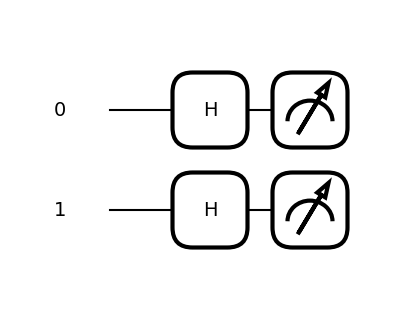

In [18]:
qml.draw_mpl(qc)()

In [ ]:
n_qubits = 1

dev = qml.device("default.qubit" , wires=n_qubits)

@qml.qnode(dev)
def qc(angle):
    for i in range(n_qubits):
        qml.RY(angle , wires=0)


    return qml.probs(), qml.state()


angle = 2*np.arccos(np.sqrt(0.2))
qc(angle)


(array([0.2, 0.8]), array([0.4472136 +0.j, 0.89442719+0.j]))

In [30]:
n_qubits = 4

dev = qml.device("default.qubit" , wires=n_qubits)

@qml.qnode(dev)
def qc():
    qml.Hadamard(wires=0)
    qml.ctrl(qml.PauliX , control=[0,1,2])(wires=3)

    return qml.probs(), qml.state()


qc()


(array([0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. ,
        0. , 0. , 0. ]),
 array([0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.70710678+0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j,
        0.        +0.j, 0.        +0.j, 0.        +0.j, 0.        +0.j]))

(<Figure size 500x500 with 1 Axes>, <Axes: >)

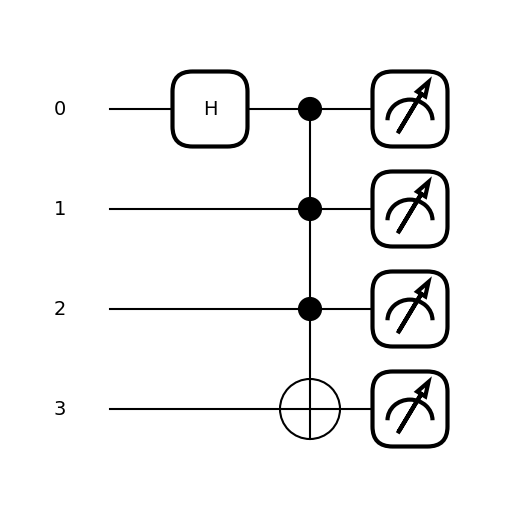

In [31]:
qml.draw_mpl(qc)()

In [22]:
n_qubits = 1

dev = qml.device("lightning.qubit" , wires=n_qubits)

@qml.qnode(dev)
def qc(params):
    qml.Rot(params[0], params[1], params[2], wires=0)

    #return qml.state() ,   qml.expval(qml.PauliX(0)), qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(0)),
    return qml.expval(qml.PauliX(0)), qml.expval(qml.PauliY(0)), qml.expval(qml.PauliZ(0)),

In [11]:
from qutip import Bloch, Qobj 

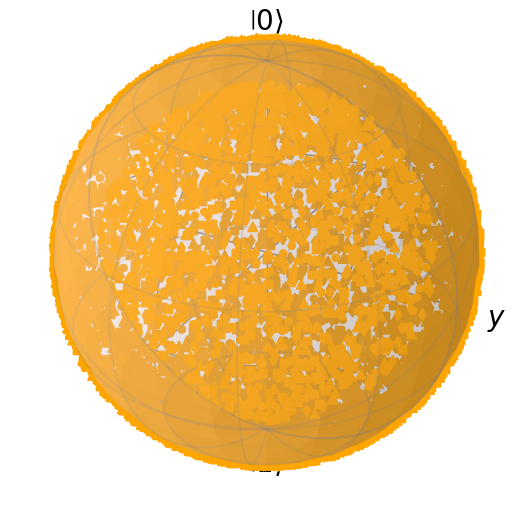

In [24]:
n_samples = 10000
params = np.random.uniform(0, 2*np.pi, (n_samples, 3))
b = Bloch()
for p in params:
    x,y,z = qc(p)         # complex 2-vector
    #psi_q = Qobj(np.asarray(psi), dims=[[2],[1]])  # make a ket Qobj
    #b.add_states(psi_q)
    b.add_points([x, y, z], colors=['orange'])  # add the point on the Bloch sphere

b.show()  # opens a Matplotlib figure with all points